# Program to Predict the class whether it is Star or Galaxy or Qso Using Logisistic Regression

## Problem Statement

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading Dataset
df=pd.read_csv("space_server.csv")
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
#converting scientific number to numeric
pd.options.display.float_format="{:.2f}".format

###### Attributes Description:

1)objid = Object Identifier

     contains photometric data
    
2)ra = J2000 Right Ascension (r-band)

    Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question.

3)dec = J2000 Declination (r-band)

     declination (abbreviated DEC) when combined with ra these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.
     
4)u = better of DeV/Exp magnitude fit

5)g = better of DeV/Exp magnitude fit

6)r = better of DeV/Exp magnitude fit

7)i = better of DeV/Exp magnitude fit

8)z = better of DeV/Exp magnitude fit     

    The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.
    
9)run = Run Number

    run number, which identifies the specific scan
    
10)rereun = Rerun Number    

    An additional number, rerun, specifies how the image was processed
    
11)camcol = Camera column

    the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run
    
12)field = Field number(Our Target Attribute)

    the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
    
13)specobjid = Object Identifier

    "SpecObj" which contains spectral data.

14)class = object class (galaxy, star or quasar object)

    The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict
    
15)redshift = Final Redshift

    redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum
    
16)plate = plate number

    Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.
    
17)mjd = MJD of observation

    Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
    
18)fiberid = fiber ID

   The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

# Basis Statistics about the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
df.shape

(10000, 18)

In [6]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [7]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

# Finding Missing Values

In [8]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

There are no missing Values in any columns

# Exploring Attributes

##### column class

In [9]:
df["class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

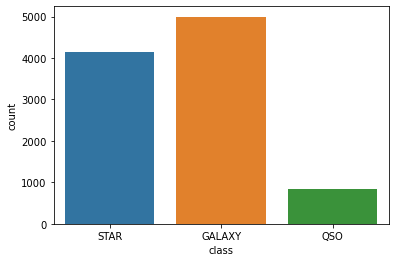

In [10]:
#Graphical visuvalisation
sns.countplot(df["class"])

OBSERVATION

The countplot shows that there is more galaxy registered followed by star and qso

##### Column camcol

In [11]:
df["camcol"].value_counts()

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64

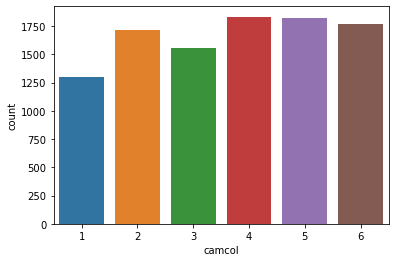

In [12]:
sns.countplot(df["camcol"])

OBSERVATION:

The camera column 4 has more number of entries for identifying the scanline within the run

The camera column 1 has less number of entries for identifying the scanline within the run

##### Column rerun

In [13]:
df["rerun"].value_counts()

301    10000
Name: rerun, dtype: int64

this columnn has only one value throughout the dataset so it will not help us in any way 

so lets drop

In [14]:
#dropping column rerun
df.drop(columns=["rerun"],inplace=True)

##### column objid

In [15]:
df["objid"].value_counts()

1237650000000000000.00    10000
Name: objid, dtype: int64

this columnn has only one value throughout the dataset so it will not help us in any way 

so lets drop

In [16]:
#dropping column objid
df.drop(columns=["objid"],inplace=True)

In [17]:
df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,175.53,14.84,18.62,17.37,16.84,16.58,16.42,981.03,3.65,302.38,1645021569800003584.00,0.14,1460.99,52943.53,353.07
std,47.78,25.21,0.83,0.95,1.07,1.14,1.20,273.31,1.67,162.58,2013998492866906624.00,0.39,1788.78,1511.15,206.30
min,8.24,-5.38,12.99,12.80,12.43,11.95,11.61,308.00,1.00,11.00,299578000000000000.00,-0.00,266.00,51578.00,1.00
25%,157.37,-0.54,18.18,16.82,16.17,15.85,15.62,752.00,2.00,184.00,338924750000000000.00,0.00,301.00,51900.00,186.75
50%,180.39,0.40,18.85,17.50,16.86,16.55,16.39,756.00,4.00,299.00,496658000000000000.00,0.04,441.00,51997.00,351.00
75%,201.55,35.65,19.26,18.01,17.51,17.26,17.14,1331.00,5.00,414.00,2881300000000000000.00,0.09,2559.00,54468.00,510.00
max,260.88,68.54,19.60,19.92,24.80,28.18,22.83,1412.00,6.00,768.00,9468830000000000000.00,5.35,8410.00,57481.00,1000.00


1)Here we find that the median is higher than mean in most of the columns

If the mean is less than the median, the distribution is negatively skewed.

2)the maximum and the 75% shows huge range of difference 

3)In column "dec" there is a wide range of difference between mean and the median(50%) 

From above we infer that we may have few outliers and skewness in some of the attributes 



# EDA

###### UNIVARIATE ANALYSIS

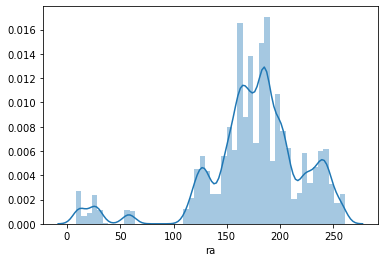

In [18]:
sns.distplot(df["ra"])


The range of right ascending is high between 150 to 200


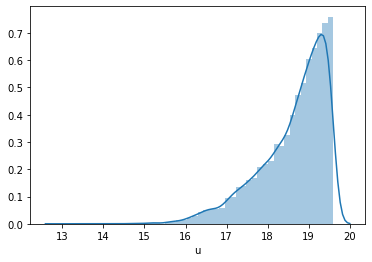

In [19]:
sns.distplot(df["u"])


Response of the "u" band of the telescope shows left skewed distribution.

It shows the value is Negatively skewed

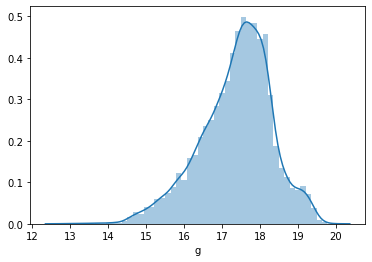

In [20]:
sns.distplot(df["g"])


Response of the "g" band of the telescope shows left skewed distribution

It shows the value is Negatively skewed



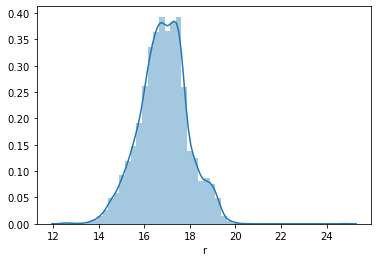

In [21]:
sns.distplot(df["r"])

Response of the "r" band of the telescope shows normal distribution

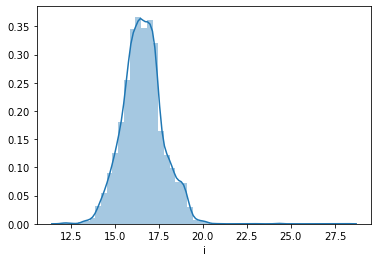

In [22]:
sns.distplot(df["i"])

Response of the "i" band of the telescope shows normal distribution

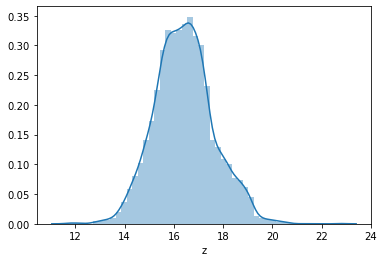

In [23]:
sns.distplot(df["z"])

Response of the "z" band of the telescope shows normal distribution

###### Bivariate Analysis

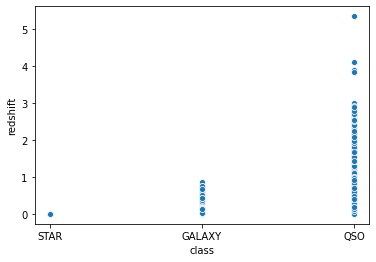

In [24]:
#Class vs redshift
sns.scatterplot(x="class",y="redshift",data=df)

we observe that QSO has more redshift when compared with GALAXY and STAR

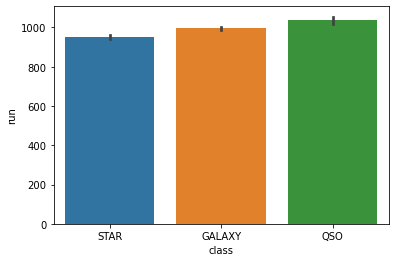

In [25]:
#class vs run
sns.barplot (x="class",y="run",data=df)

"run"(Specified scan) is higher in QSO followed by GALAXY and STAR

# Encoding Target Variable

In [26]:
#change Target variable "class" from object datatype to Numeric
df["class"]=df["class"].map({"STAR":0,"GALAXY":1,"QSO":2}).astype(int)

In [27]:
df.dtypes

ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
camcol         int64
field          int64
specobjid    float64
class          int32
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

# CORRELATION

In [28]:
cor=df.corr()
cor

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
ra,1.00,0.00,0.03,0.04,0.05,0.05,0.04,-0.09,-0.01,0.59,-0.10,0.04,0.03,-0.10,-0.09,0.06
dec,0.00,1.00,0.04,0.06,0.06,0.06,0.06,0.78,0.11,-0.13,0.09,0.09,0.07,0.09,0.07,0.16
u,0.03,0.04,1.00,0.85,0.69,0.60,0.55,0.04,0.01,0.01,-0.13,0.28,0.16,-0.13,-0.17,0.01
g,0.04,0.06,0.85,1.00,0.96,0.91,0.88,0.06,0.01,0.01,-0.05,0.36,0.41,-0.05,-0.09,0.05
r,0.05,0.06,0.69,0.96,1.00,0.98,0.97,0.06,0.01,0.02,0.02,0.28,0.44,0.02,-0.01,0.06
i,0.05,0.06,0.60,0.91,0.98,1.00,0.98,0.05,0.01,0.02,0.07,0.21,0.43,0.07,0.05,0.07
z,0.04,0.06,0.55,0.88,0.97,0.98,1.00,0.05,0.01,0.02,0.11,0.15,0.42,0.11,0.10,0.07
run,-0.09,0.78,0.04,0.06,0.06,0.05,0.05,1.00,0.15,-0.46,0.09,0.10,0.06,0.09,0.07,0.14
camcol,-0.01,0.11,0.01,0.01,0.01,0.01,0.01,0.15,1.00,-0.07,0.04,0.01,0.01,0.04,0.03,0.54
field,0.59,-0.13,0.01,0.01,0.02,0.02,0.02,-0.46,-0.07,1.00,-0.09,-0.00,0.02,-0.09,-0.09,-0.04


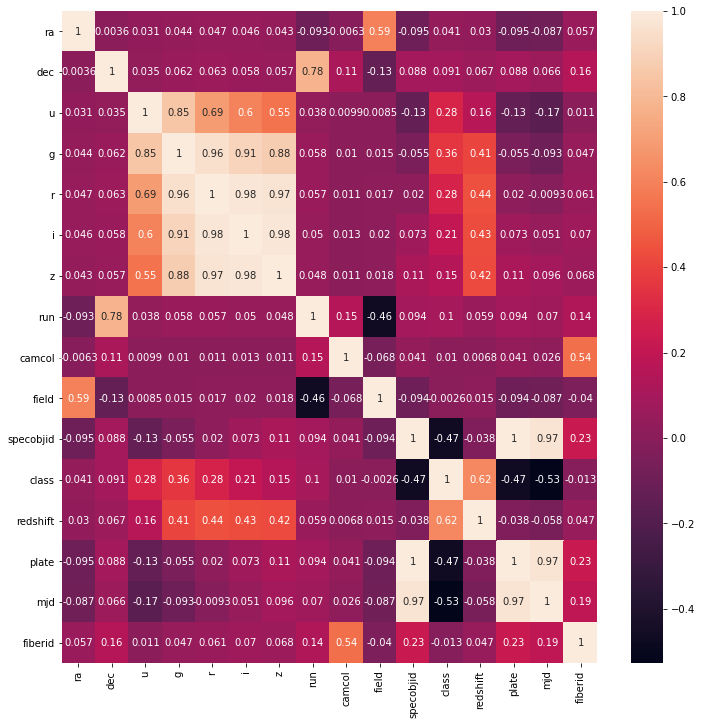

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap((cor),annot=True)

KEY OBSERVATION:

from the above result it is clear that some columns making positive correlation while some has negative correlation to the target variable 

columns making positive correlation

1)ra

2)dec

3)u

4)g 

5)r  

6)i

7)z

8)run

9)camcol

10)field

11)redshift

columns making negative correlation

1)specobjid

2)plate

3)mjd

4)fiberid

                 
                  




# DATA CLEANING

In [30]:
#Dropping columns which are not related
df.drop(columns=["specobjid","plate","mjd","fiberid"],inplace=True)

### Finding Outliers

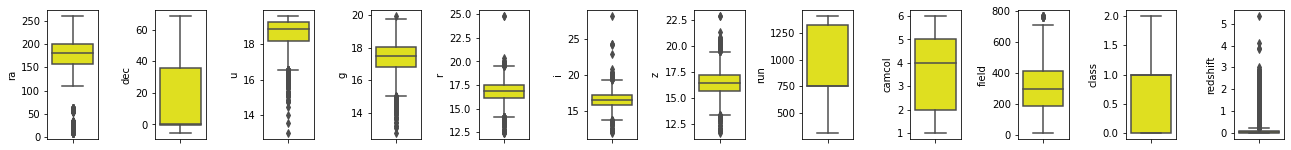

In [31]:
#Plotting Outliers
collist=df.columns.values
ncol=30
nrow=15
plt.figure(figsize=(3*nrow,ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="yellow",orient="v")
    plt.tight_layout()               

we find outliers in most of the columns

### Treating Outliers

In [32]:
#using z-score technique
#Removing Outliers
#Z-score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df))
z


array([[0.16745842, 0.58492272, 1.03148637, ..., 0.21763043, 1.07093597,
        0.36973112],
       [0.16886159, 0.58311429, 0.05243046, ..., 0.21763043, 1.07093597,
        0.36984929],
       [0.17057433, 0.58347525, 0.92156796, ..., 0.21147922, 0.52795321,
        0.05302706],
       ...,
       [0.92039468, 1.46090664, 0.16753826, ..., 0.86350751, 1.07093597,
        0.37074104],
       [0.92197294, 1.46432109, 0.31801835, ..., 0.8573563 , 0.52795321,
        0.33364691],
       [0.91804124, 1.46639319, 0.79229193, ..., 0.8573563 , 0.52795321,
        0.06510125]])

In [33]:
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9929, 9940, 9956], dtype=int64), array([11, 11, 11, ...,  2, 11, 11], dtype=int64))


In [34]:
df.shape

(10000, 12)

In [35]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(9097, 12)

In [36]:
#Percentage loss
loss=(10000-9097)/10000*100
loss

9.030000000000001

### finding skewness

In [37]:
df_new.skew()

ra         -0.22
dec         1.18
u          -0.98
g          -0.53
r          -0.15
i           0.05
z           0.16
run         0.44
camcol     -0.16
field       0.23
class       0.27
redshift    4.95
dtype: float64

Range of Skewness is (+/- 0.55)
from the above observation the following columns falls under high skewness

1) dec

2) redshift

3) u




In [38]:
#Skewness treatment
#treating using log
threshold=0.55
import numpy as np
for i in df_new.columns:
    if df[i].skew()>0.55:
        df[i]=np.log1p(df[i])
    

In [39]:
#after Skewness Removed
df_new.skew()

ra         -0.22
dec         1.18
u          -0.98
g          -0.53
r          -0.15
i           0.05
z           0.16
run         0.44
camcol     -0.16
field       0.23
class       0.27
redshift    4.95
dtype: float64

# Seperating Target Variable


In [40]:
x_l=df_new.drop(["class"],axis=1)
y=df_new["class"]

# Scaling Input Variable

In [41]:
# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_l)
x


array([[ 0.04916759, -0.57101034,  1.07690461, ...,  0.18131364,
        -0.26995466, -0.44974143],
       [ 0.05098843, -0.56922957,  0.03761941, ...,  0.18131364,
        -0.26995466, -0.45001456],
       [ 0.053211  , -0.569585  ,  0.96022427, ...,  0.18131364,
        -0.26370923,  0.28225668],
       ...,
       [-1.36249802,  1.44353856,  0.15980837, ..., -0.41435634,
        -0.92572468, -0.45207567],
       [-1.36454607,  1.4469008 ,  0.31954566, ..., -0.41435634,
        -0.91947925, -0.36634001],
       [-1.35944405,  1.44894122,  0.82299547, ..., -0.41435634,
        -0.91947925,  0.25434958]])

In [62]:
df

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift
0,183.53,0.09,19.47,17.04,15.95,15.50,15.23,752,4,267,0,-0.00
1,183.60,0.13,18.66,17.21,16.68,16.49,16.39,752,4,267,0,-0.00
2,183.68,0.12,19.38,18.19,17.47,17.09,16.80,752,4,268,1,0.12
3,183.87,0.05,17.77,16.60,16.16,15.98,15.90,752,4,269,0,-0.00
4,183.88,0.10,17.55,16.26,16.44,16.55,16.61,752,4,269,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.32,3.96,18.82,17.47,16.92,16.68,16.51,1345,3,161,1,0.03
9996,131.31,3.96,18.27,17.44,17.08,16.72,16.70,1345,3,162,1,0.11
9997,131.55,3.96,18.76,17.78,17.52,17.43,17.42,1345,3,162,0,-0.00
9998,131.48,3.97,18.88,17.91,17.53,17.36,17.14,1345,3,163,1,0.01


# preparing dataset for model training


#### splitting the testing and training data

In [42]:
#importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [44]:
print(x_train.shape,"\t",x_test.shape)

(7277, 11) 	 (1820, 11)


# Selecting Best Model

### finding best model

Popular algorithms that can be used for multi-class classification include:

1)k-Nearest Neighbors.

2)Decision Trees.

3)Support Vector Machine

4)Naive Bayes.

4)Random Forest classifier

6)Gradient Boosting

In [45]:
#importing our model library
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.svm import SVC
svc=SVC()
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()


#### using Algorithms via for loop

In [46]:
model=[knn,dt,svc,rf,gb]
for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print("the score of ",m,"is")
    print("training accuracy score  :",accuracy_score(y_train,pred_train)*100)
    print("testing accuracy score  :",accuracy_score(y_test,pred_test)*100)
    print("*********************************************************************")
    print("\n\n")
    

the score of  KNeighborsClassifier() is
training accuracy score  : 92.51064999312904
testing accuracy score  : 87.85714285714286
*********************************************************************



the score of  DecisionTreeClassifier() is
training accuracy score  : 100.0
testing accuracy score  : 98.46153846153847
*********************************************************************



the score of  SVC() is
training accuracy score  : 97.58142091521232
testing accuracy score  : 96.97802197802197
*********************************************************************



the score of  RandomForestClassifier() is
training accuracy score  : 100.0
testing accuracy score  : 98.46153846153847
*********************************************************************



the score of  GradientBoostingClassifier() is
training accuracy score  : 99.86258073381889
testing accuracy score  : 98.73626373626374
*********************************************************************





In [47]:
#finding accuracy Score of KNeighbors
from sklearn.model_selection import cross_val_score
nb=GaussianNB(priors = None, var_smoothing = 1e-09)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.20)
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)
pred_train=nb.predict(x_train)
nbc=accuracy_score(y_test,nb_pred)
print("Acuuracy score of nb is")
print("training accuracy score  :",accuracy_score(y_train,pred_train)*100)
print("testing accuracy score  : ",nbc*100)


Acuuracy score of nb is
training accuracy score  : 98.00742064037378
testing accuracy score  :  97.96703296703296


In [48]:
#importing 
#classification Report
#confusion_matrix
#f1_score
#roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [49]:
alg=[knn,dt,svc,rf,gb,nb]
for m in alg:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print("Report of ",m, "is")
    print("confussion matrix \n",confusion_matrix(y_test,pred_test))
    print("classification_report  \n",classification_report(y_test,pred_test))
   
   


Report of  KNeighborsClassifier() is
confussion matrix 
 [[688  82   0]
 [111 841   3]
 [  1  17  77]]
classification_report  
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       770
           1       0.89      0.88      0.89       955
           2       0.96      0.81      0.88        95

    accuracy                           0.88      1820
   macro avg       0.91      0.86      0.88      1820
weighted avg       0.88      0.88      0.88      1820

Report of  DecisionTreeClassifier() is
confussion matrix 
 [[769   1   0]
 [  1 941  13]
 [  0  11  84]]
classification_report  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       770
           1       0.99      0.99      0.99       955
           2       0.87      0.88      0.87        95

    accuracy                           0.99      1820
   macro avg       0.95      0.96      0.95      1820
weighted avg       0.99      0.99  

In [50]:
#cross-validating for checking upper/lower cutting
from sklearn.model_selection import cross_val_score
alg=[knn,dt,svc,rf,gb,nb]
for m in alg:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    accuracy=accuracy_score(y_test,pred_test)
    for i in range(2,5):
        cr=cross_val_score(knn,x,y,cv=i)
        cross=cr.mean()
        print(m)
        print("At cv : ",i,"\ncross val score is : ",cross*100,"\naccuracy score is: ",accuracy*100)
        print("******************************************************************************")
        print("\n\n")

        



KNeighborsClassifier()
At cv :  2 
cross val score is :  83.46697293788945 
accuracy score is:  88.24175824175823
******************************************************************************



KNeighborsClassifier()
At cv :  3 
cross val score is :  84.78594881689861 
accuracy score is:  88.24175824175823
******************************************************************************



KNeighborsClassifier()
At cv :  4 
cross val score is :  84.53334879720104 
accuracy score is:  88.24175824175823
******************************************************************************



DecisionTreeClassifier()
At cv :  2 
cross val score is :  83.46697293788945 
accuracy score is:  98.68131868131869
******************************************************************************



DecisionTreeClassifier()
At cv :  3 
cross val score is :  84.78594881689861 
accuracy score is:  98.68131868131869
******************************************************************************



DecisionTreeClas

# Observation

##### From all the above we infer that the "Random Forest Classifier" performs well.

It gives the Best results when compared with other models.

        the score of  RandomForestClassifier() is

        training accuracy score  : 100.0

        testing accuracy score  : 98.4065934065934



In [51]:
#Hyper parameter Tuning
#RandomForestClassifier
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters={"n_estimators" :[1,10,100,1000], "random_state": list(range(0,10))}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'n_estimators': 1000, 'random_state': 1}


In [56]:
#using RandomForestClassification with best Result
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1,n_estimators=1000)
rf.fit(x_train,y_train)
rf_test_pred=rf.predict(x_test)
rf_train_pred=rf.predict(x_train)
rf_test_acc=accuracy_score(y_test,rf_test_pred)
rf_train_acc=accuracy_score(y_train,rf_train_pred)
print("training accuracy : ",rf_train_acc*100)
print("improved testing accuracy : ",rf_test_acc*100)


training accuracy :  100.0
improved testing accuracy :  98.73626373626374


In [54]:
#finding cross_validation_score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1,n_estimators=1000)
rf.fit(x_train,y_train)
rf_test_pred=rf.predict(x_test)
rf_test_acc=accuracy_score(y_test,rf_test_pred)
rf_cvscore=cross_val_score(rf,x,y).mean()
print("accuracy_score is : ",rf_test_acc*100)
print("cv score is ",(rf_cvscore*100))


accuracy_score is :  98.73626373626374
cv score is  98.93369137734173


# MODEL SAVING 

In [59]:
import joblib
joblib.dump(rf,"space_server.obj")


['space_server.obj']

# CONCLUSION

In [61]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_con=pd.DataFrame({"original":a,"Predicted":predicted})
df_con.head(10)

,original,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


# SAMPLE

In [65]:
td=np.array([134,3,18.27,17.31,15,15.50,16.80,1320,2,163,-0.00])
td.shape

(11,)

In [66]:
td=td.reshape(1,-1)
td

array([[ 134.  ,    3.  ,   18.27,   17.31,   15.  ,   15.5 ,   16.8 ,
        1320.  ,    2.  ,  163.  ,   -0.  ]])

In [68]:
rf.predict(td) 

array([1])

### result
The class  1 represents "Galaxy"